In [1]:
import pandas as pd
import numpy as np

In [2]:
d3=pd.read_csv('p3_features.csv')

In [3]:
d3.head()

,ID,x_mean_Acc,y_mean_Acc,z_mean_Acc,x_mean_Lin,y_mean_Lin,z_mean_Lin,x_mean_Gyro,y_mean_Gyro,z_mean_Gyro,...,x_arg_diff_fft_Acc,y_arg_diff_fft_Acc,z_arg_diff_fft_Acc,x_arg_diff_fft_Lin,y_arg_diff_fft_Lin,z_arg_diff_fft_Lin,x_arg_diff_fft_Gyro,y_arg_diff_fft_Gyro,z_arg_diff_fft_Gyro,label_of_activity
0,0,2.916607,-8.161198,-1.013280,-0.025831,-0.489608,0.409123,-0.088660,0.026085,-0.010426,...,4,15,13,10,7,14,8,22,8,walking
1,1,2.935164,-8.208905,-1.012172,0.128304,-0.485645,0.240150,0.052375,-0.029056,0.043578,...,4,5,14,5,3,13,14,20,20,walking
2,2,2.865867,-8.152697,-0.955749,-0.051508,-0.469879,0.414271,-0.074941,0.018909,0.002833,...,4,7,22,2,4,14,8,13,8,walking
3,3,2.905892,-8.285190,-0.907860,0.078983,-0.583318,0.346248,-0.008260,-0.019412,0.009301,...,3,4,15,4,4,14,14,4,16,walking
4,4,2.940542,-8.113696,-0.935065,0.006489,-0.470584,0.457236,-0.037266,0.026800,0.040356,...,5,4,20,4,4,15,14,4,8,walking


In [4]:
d3.shape

(2095, 338)

In [5]:
d3.drop(["ID"],axis=1,inplace=True)

In [6]:
d3['label_of_activity'].unique()

array(['walking', 'standing', 'jogging', 'sitting', 'biking', 'upstairs',
       'downstairs'], dtype=object)

In [7]:
d3.replace('walking',0,inplace=True)
d3.replace('standing',1,inplace=True)
d3.replace('jogging',2,inplace=True)
d3.replace('sitting',3,inplace=True)
d3.replace('biking',4,inplace=True)
d3.replace('upstairs',5,inplace=True)
d3.replace('downstairs',6,inplace=True)

In [8]:
d3.head()

,x_mean_Acc,y_mean_Acc,z_mean_Acc,x_mean_Lin,y_mean_Lin,z_mean_Lin,x_mean_Gyro,y_mean_Gyro,z_mean_Gyro,x_std_Acc,...,x_arg_diff_fft_Acc,y_arg_diff_fft_Acc,z_arg_diff_fft_Acc,x_arg_diff_fft_Lin,y_arg_diff_fft_Lin,z_arg_diff_fft_Lin,x_arg_diff_fft_Gyro,y_arg_diff_fft_Gyro,z_arg_diff_fft_Gyro,label_of_activity
0,2.916607,-8.161198,-1.013280,-0.025831,-0.489608,0.409123,-0.088660,0.026085,-0.010426,1.130649,...,4,15,13,10,7,14,8,22,8,0
1,2.935164,-8.208905,-1.012172,0.128304,-0.485645,0.240150,0.052375,-0.029056,0.043578,1.126856,...,4,5,14,5,3,13,14,20,20,0
2,2.865867,-8.152697,-0.955749,-0.051508,-0.469879,0.414271,-0.074941,0.018909,0.002833,1.122623,...,4,7,22,2,4,14,8,13,8,0
3,2.905892,-8.285190,-0.907860,0.078983,-0.583318,0.346248,-0.008260,-0.019412,0.009301,1.117856,...,3,4,15,4,4,14,14,4,16,0
4,2.940542,-8.113696,-0.935065,0.006489,-0.470584,0.457236,-0.037266,0.026800,0.040356,1.089845,...,5,4,20,4,4,15,14,4,8,0


In [9]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
X = d3.iloc[:,0:335]
y = d3['label_of_activity']

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train , y_test = train_test_split(X,y,test_size=0.3) 

In [12]:
scaler = MinMaxScaler()
X_train[list(X_train.columns)] = scaler.fit_transform(X_train[list(X_train.columns)])
X_test[list(X_test.columns)] = scaler.transform(X_test[list(X_test.columns)])

<ipython-input-12-3d0b614e0c44>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[list(X_train.columns)] = scaler.fit_transform(X_train[list(X_train.columns)])
C:\Users\USER\anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
<ipython-input-12-3d0b614e0c44>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

In [13]:
X_train=pd.DataFrame(X_train)
X_test=pd.DataFrame(X_test)

In [14]:
X_train.head()

,x_mean_Acc,y_mean_Acc,z_mean_Acc,x_mean_Lin,y_mean_Lin,z_mean_Lin,x_mean_Gyro,y_mean_Gyro,z_mean_Gyro,x_std_Acc,...,y_argmin_fft_Gyro,z_argmin_fft_Gyro,x_arg_diff_fft_Acc,y_arg_diff_fft_Acc,z_arg_diff_fft_Acc,x_arg_diff_fft_Lin,y_arg_diff_fft_Lin,z_arg_diff_fft_Lin,x_arg_diff_fft_Gyro,y_arg_diff_fft_Gyro
677,0.460725,0.166117,0.903296,0.565649,0.279998,0.331273,0.654589,0.522976,0.594210,0.926579,...,0.464286,0.464286,0.384615,0.076923,0.076923,0.384615,0.153846,0.076923,0.423077,0.000000
1885,0.158465,0.092403,0.765925,0.274092,0.486587,0.484350,0.336995,0.846594,0.797543,0.279575,...,0.357143,0.428571,0.038462,0.000000,0.384615,0.269231,0.076923,0.153846,0.423077,0.230769
1340,0.830866,0.676275,0.166420,0.199970,0.430036,0.510605,0.590673,0.501606,0.483158,0.411657,...,0.500000,0.392857,0.076923,0.076923,0.615385,0.000000,0.730769,0.230769,0.500000,0.153846
1605,0.159043,0.093697,0.763649,0.412406,0.289061,0.588778,0.511972,0.511304,0.573478,0.210456,...,0.500000,0.464286,0.115385,0.153846,0.538462,0.653846,0.230769,0.384615,0.269231,0.500000
1341,0.838789,0.658185,0.157303,0.225514,0.408794,0.459723,0.601597,0.501450,0.472647,0.403799,...,0.178571,0.785714,0.538462,0.192308,0.192308,0.653846,0.038462,0.076923,0.500000,0.153846


In [15]:
y_train.head()

677     2
1885    6
1340    4
1605    5
1341    4
Name: label_of_activity, dtype: int64

In [16]:
#X = d1.loc[:,0:335]
#y = d1[]
#from sklearn import preprocessing
#label_encoder = preprocessing.LabelEncoder()
#y=label_encoder.fit_transform(y)

In [17]:
# import necessary library
from sklearn.feature_selection import VarianceThreshold

# we're setting variance threshold at 0
var_thres=VarianceThreshold(threshold=0)

# fitting this variance threshold in all columns of Newly Created  training data
var_thres.fit(X_train)

# get the number of constant columns (whoose variance is 0)
constant_columns = [column for column in X_train.columns if column not in X_train.columns[var_thres.get_support()]]
print(len(constant_columns))

# dropping constant columns
X_train.drop(constant_columns, axis=1, inplace=True)

0


In [18]:
# function to get all features highly correlated (both positive and negative) with another for a given threshold
def correlation(dataset, threshold):
    col_corr = set()  #set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:  # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  #getting the name of the column
                col_corr.add(colname)
    return col_corr                        

corr_features = correlation(X_train, 0.95)
len(corr_features)

158

In [19]:
# dropping highly correlated features
X_train.drop(corr_features, axis=1, inplace=True)

In [20]:
X_train.shape

(1466, 177)

In [21]:
## Importing Libraries
from sklearn.feature_selection import mutual_info_classif
#from sklearn.preprocessing import MinMaxScaler

## Copy data in another dataframe to retrieve latter
d=X_train.copy()

## Calculate mutual information
mutual_info = mutual_info_classif(X_train, y_train, random_state=0)
mutual_info

## Storing original data into X_train_new
X1_train = X_train.copy()

mutual_info = pd.Series(mutual_info)
mutual_info.index = X1_train.columns
print(mutual_info.sort_values(ascending = False))



## Visual Representaion
#figure(figsize=(10,10), dpi=100)
#ranked_features.sort_values().plot(kind='barh')
#plt.axvline(x=0.005,c='r')
#plt.show()

z_max_Acc        1.699707
y_min_Acc        1.641515
x_min_Acc        1.613278
y_mean_Acc       1.611730
y_max_Acc        1.608929
                   ...   
y_argmin_Acc     0.000000
z_argmin_Acc     0.000000
x_argmin_Lin     0.000000
y_argmin_Lin     0.000000
x_argmin_Gyro    0.000000
Length: 177, dtype: float64


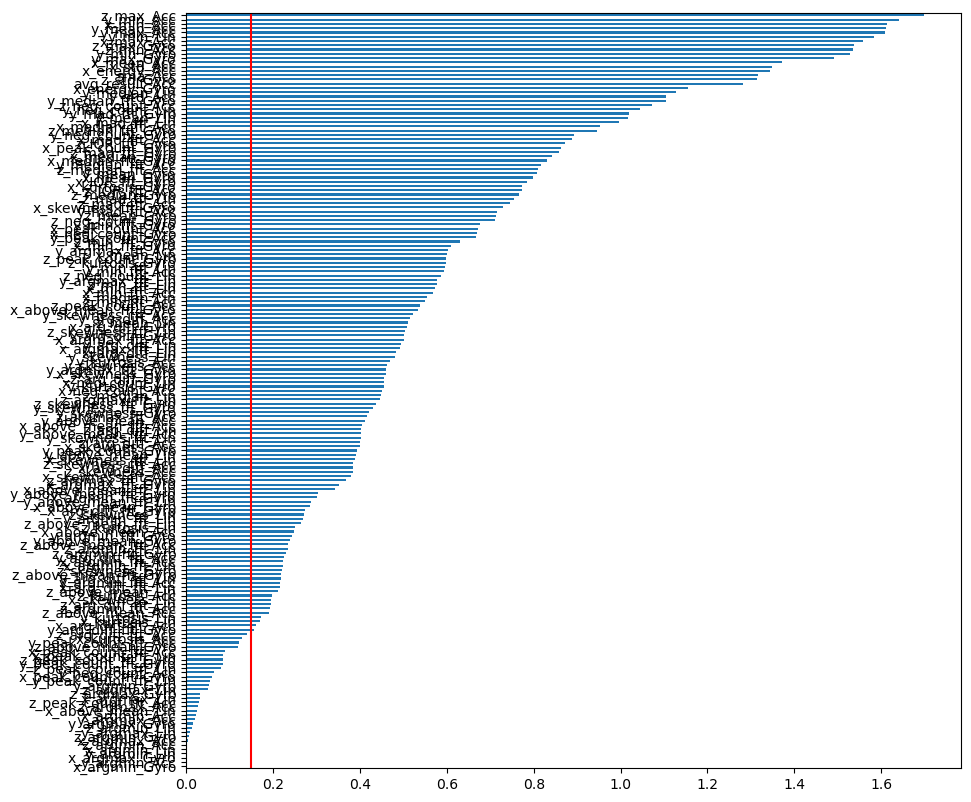

In [22]:
import matplotlib.pyplot as plt
# adjust the figure size
from matplotlib.pyplot import figure
figure(figsize=(10,10), dpi=100)
mutual_info.sort_values().plot(kind='barh')
plt.axvline(x=0.15,c='r')

In [23]:
l5=[]
for i in range(len(list(mutual_info))):
    if list(mutual_info)[i]<=0.15:
        l5.append(list(X_train.columns)[i])

In [24]:
len(l5)

32

In [25]:
X_train.drop(l5,axis=1,inplace=True)

In [26]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

## Fit ExtraTreesClassifier with best set of parameters
model = ExtraTreesClassifier(n_estimators=50, min_samples_split=2, min_samples_leaf=3, criterion='gini',random_state=0)
model.fit(X_train,y_train)
print("model.feature_importances_:\n")
print(model.feature_importances_)
print("\n")
print("X_train.columns:\n")
print(X_train.columns)
ranked_features = pd.Series(model.feature_importances_, index = X_train.columns)

model.feature_importances_:

[3.99829752e-02 4.38217336e-02 1.42858531e-03 9.93669894e-03
 1.08603731e-03 4.73891369e-03 1.12407229e-02 8.75604550e-03
 3.10487025e-02 1.57594899e-02 4.63853581e-02 1.40461588e-02
 2.27589550e-02 4.15560617e-02 1.68547059e-02 1.93552239e-02
 1.53718287e-02 3.22459675e-02 4.71154136e-02 9.33958134e-03
 1.11652258e-02 1.22159833e-03 1.34640042e-02 3.09309137e-03
 4.74544207e-03 3.11305973e-03 2.13391516e-02 1.17218820e-02
 1.39363745e-03 2.39263524e-02 6.71134337e-03 7.61664005e-03
 1.58111678e-02 5.07934030e-03 9.85165613e-04 4.96854407e-03
 9.43640146e-04 9.14985141e-03 2.20631067e-03 6.21916946e-04
 1.84562226e-03 7.96799489e-03 4.02109299e-03 7.29934102e-04
 3.98578119e-03 3.41778967e-03 2.13248145e-03 3.54874128e-03
 4.32220393e-03 2.02854628e-03 4.17622814e-04 9.38129255e-03
 1.57904765e-03 4.71466548e-03 4.64780685e-03 5.58673751e-04
 1.55306638e-03 2.60155158e-03 6.31622068e-04 3.82301501e-04
 9.99826510e-04 8.78787167e-03 1.06824997e-03 1.27028930

Visual Representation of Feature Importance from Model (Red line indicates value=0.005):


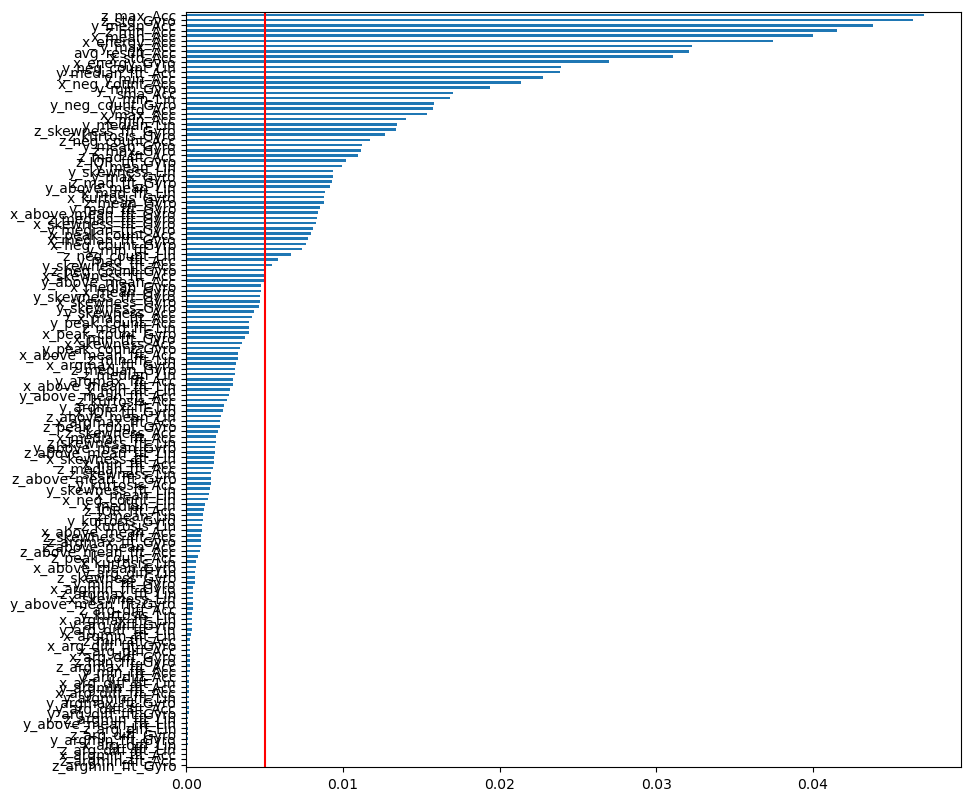

In [27]:
print("Visual Representation of Feature Importance from Model (Red line indicates value=0.005):")

## Visual Representaion
figure(figsize=(10,10), dpi=100)
ranked_features.sort_values().plot(kind='barh')
plt.axvline(x=0.005,c='r')
plt.show()

In [28]:
l6=[]
for i in range(len(list(ranked_features))):
    if list(mutual_info)[i]<=0.005:
        l6.append(list(X_train.columns)[i])

In [29]:
len(l6)

7

In [30]:
X_train.drop(l6,axis=1,inplace=True)

In [31]:
len(X_train.columns)

138

In [32]:
from collections import Counter
counter = Counter(y_train)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))  ## balanced data

Class=2, n=202 (9.642%)
Class=6, n=218 (10.406%)
Class=4, n=221 (10.549%)
Class=5, n=217 (10.358%)
Class=3, n=201 (9.594%)
Class=1, n=209 (9.976%)
Class=0, n=198 (9.451%)


# Testing Data Preparation

In [33]:
X_test.drop(constant_columns, axis=1, inplace=True)
X_test.drop(corr_features, axis=1, inplace=True)
X_test.drop(l5,axis=1,inplace=True)
X_test.drop(l6,axis=1,inplace=True)

In [34]:
X_test.shape

(629, 138)

In [35]:
# all features excluded from tarining and testing
features_excluded_3= []
features_excluded_3.extend(constant_columns)
features_excluded_3.extend(corr_features)
features_excluded_3.extend(l5)
features_excluded_3.extend(l6)

In [36]:
len(features_excluded_3)

197

In [37]:
features_excluded_3

['x_peak_count_Lin',
 'z_energy_fft_Gyro',
 'y_maxmin_diff_fft_Lin',
 'z_kurtosis_fft_Acc',
 'x_energy_Lin',
 'z_IQR_Lin',
 'z_mean_fft_Gyro',
 'z_energy_Lin',
 'avg_result_Accl_fft_Gyro',
 'z_energy_Gyro',
 'x_energy_fft_Gyro',
 'x_aad_fft_Lin',
 'y_maxmin_diff_Acc',
 'x_IQR_fft_Acc',
 'x_maxmin_diff_Lin',
 'y_energy_fft_Lin',
 'y_aad_Gyro',
 'x_mad_Lin',
 'y_median_Gyro',
 'z_pos_count_Lin',
 'z_mad_Gyro',
 'x_energy_fft_Lin',
 'z_median_fft_Lin',
 'z_maxmin_diff_fft_Lin',
 'z_max_fft_Gyro',
 'z_IQR_Gyro',
 'y_mad_Lin',
 'z_mad_Lin',
 'y_energy_Lin',
 'z_energy_Acc',
 'y_kurtosis_fft_Acc',
 'y_energy_fft_Acc',
 'z_std_Lin',
 'y_aad_fft_Gyro',
 'x_aad_Acc',
 'z_min_Lin',
 'z_kurtosis_fft_Gyro',
 'x_maxmin_diff_Gyro',
 'z_peak_count_Lin',
 'x_maxmin_diff_fft_Gyro',
 'y_mad_Gyro',
 'x_max_fft_Acc',
 'y_aad_Lin',
 'y_median_fft_Lin',
 'y_energy_Gyro',
 'x_std_fft_Gyro',
 'y_mad_Acc',
 'y_peak_count_Lin',
 'x_maxmin_diff_fft_Acc',
 'z_maxmin_diff_fft_Gyro',
 'x_IQR_fft_Lin',
 'z_kurtosis_

# Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [39]:
# We'll also check cross validation score from training set
# Import library for Repeated Random Cross Validation
from sklearn.model_selection import ShuffleSplit
ssplit = ShuffleSplit(n_splits=10,test_size=0.30,random_state=0)

# import library for RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV


In [40]:
# creating hyperparameter grid
c_space=np.logaspace=(-5,8,15)
params_LOG = {'C':c_space,
              'max_iter':[50,100,150,200,500,1000],
              'multi_class' : ['ovr', 'multinomial']}

# instantiating logistic regression Classifier
Randomized_search_LOG = LogisticRegression()

# instantiating RandomizedSearchCV
Randomized_search_LOG = RandomizedSearchCV(Randomized_search_LOG,params_LOG,cv=5)
Randomized_search_LOG.fit(X_train,y_train)
best_params_LOG = Randomized_search_LOG.fit(X_train,y_train)

# print tuned parameters and score
print('Tuned Logistic Regression Parameters are:{}'.format(Randomized_search_LOG.best_params_))
print('Score:{}'.format(Randomized_search_LOG.best_score_))

predictions_training_LOG = Randomized_search_LOG.predict(X_train)
predictions_testing_LOG = Randomized_search_LOG.predict(X_test)


#print("Training accuracy of Support Vector Machine: ", format(accuracy_score(y_train,predictions_training_SVM),"0.2f"))
print("Training accuracy of Logistic Regression after Cross Validation in training portion:{}".format(accuracy_score(y_train,predictions_training_LOG),"0.2f"))
print("Testing accuracy of Logistic Regression:{}".format(accuracy_score(y_test,predictions_testing_LOG),"0.2f"))

C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1309, in fit
    raise ValueError("Penalty term must be positive; got (C=%r)"
ValueError: Penalty term must be positive; got (C=-5)

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\USER\anaconda3\lib\

C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_mo

Tuned Logistic Regression Parameters are:{'multi_class': 'ovr', 'max_iter': 1000, 'C': 8}
Score:0.9959044368600682
Training accuracy of Logistic Regression after Cross Validation in training portion:1.0
Testing accuracy of Logistic Regression:0.9984101748807631


In [41]:
## Confusion Matrix
cm_LOG = confusion_matrix(y_test, predictions_testing_LOG)
print("Confusion Matrix : \n", cm_LOG)

## Classification Report
print(classification_report(y_test, predictions_testing_LOG))

## probability of falling into a particular class from each observation
probs_LOG = best_params_LOG.predict_proba(X_test)
probs_LOG = probs_LOG[:,1]
probs_LOG

Confusion Matrix : 
 [[100   0   0   0   0   0   0]
 [  0  91   0   0   0   0   0]
 [  0   0  98   0   0   0   0]
 [  0   0   0  98   1   0   0]
 [  0   0   0   0  79   0   0]
 [  0   0   0   0   0  83   0]
 [  0   0   0   0   0   0  79]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00        91
           2       1.00      1.00      1.00        98
           3       1.00      0.99      0.99        99
           4       0.99      1.00      0.99        79
           5       1.00      1.00      1.00        83
           6       1.00      1.00      1.00        79

    accuracy                           1.00       629
   macro avg       1.00      1.00      1.00       629
weighted avg       1.00      1.00      1.00       629



array([2.86977420e-06, 2.19679725e-04, 9.96344195e-01, 4.31300791e-03,
       7.82151817e-04, 6.67688681e-04, 8.55661663e-05, 2.15716510e-03,
       1.49523526e-05, 6.43393503e-04, 9.95414489e-01, 9.95651254e-01,
       3.16140286e-04, 4.36418027e-06, 7.59512230e-05, 1.55292057e-04,
       9.57620081e-05, 9.50271155e-01, 9.98332552e-01, 1.30807521e-04,
       9.96435676e-01, 3.61465680e-04, 9.97696588e-01, 9.85441252e-01,
       3.07498634e-04, 9.94620382e-01, 8.98907707e-04, 3.01087209e-03,
       1.28854577e-04, 3.84018495e-07, 9.95368647e-01, 2.17210897e-03,
       3.29769588e-06, 9.33181981e-01, 7.95051084e-07, 2.07612339e-04,
       2.45718950e-04, 5.07867064e-06, 1.28280152e-05, 9.93050104e-01,
       1.20585161e-04, 1.88356494e-03, 2.87509883e-03, 7.54319020e-04,
       4.72263137e-04, 1.11987382e-06, 9.98063920e-01, 8.35631948e-04,
       1.43536146e-04, 2.32133356e-06, 9.94370367e-01, 4.31214733e-03,
       3.24756018e-06, 1.35201244e-03, 1.15566597e-03, 1.03304652e-06,
      

In [42]:
#from sklearn.model_selection import cross_val_score
#from sklearn.model_selection import RepeatedStratifiedKFold
#cv=RepeatedStratifiedKFold(n_splits=5,n_repeats=2,random_state=0)
#n_scores=cross_val_score(classifier,X,y,scoring='accuracy',cv=cv,n_jobs=-1)
#n_scores.mean()

# SVM

In [43]:
# import library for RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Import library to calculate cross validation score
from sklearn.model_selection import cross_val_score

In [44]:
# import library for Support Vector Machine
from sklearn.svm import SVC

# We'll also check cross validation score from training set
# Import library for Repeated Random Cross Validation
#from sklearn.model_selection import ShuffleSplit
#ssplit = ShuffleSplit(n_splits=10,test_size=0.30)

# import library for DecisionTree
from sklearn.svm import SVC

# make parameter Randomized for Support Vector Machine
params_SVM = {
    'C':[0.1, 1, 10, 100, 1000],
    'gamma':[1, 0.1, 0.01, 0.001, 0.0001],
    'kernel':['linear','poly','rbf']
}
print('Parameters to check are:\n',params_SVM)

# fitting Randomized_search on RandomizedForestClassifier and getting the best hyperparameters
Randomized_search_SVM = RandomizedSearchCV(SVC(probability=True, random_state=0), params_SVM, verbose=1, cv=5)
Randomized_search_SVM.fit(X_train, y_train)
best_params_SVM = Randomized_search_SVM.fit(X_train, y_train)

# print tuned parameters and score
print('Tuned SVC Parameters are:{}'.format(Randomized_search_SVM.best_params_))
print('Score:{}'.format(Randomized_search_SVM.best_score_))  # Mean cross-validated score of the best_estimator
predictions_training_SVM = Randomized_search_SVM.predict(X_train)
predictions_testing_SVM = Randomized_search_SVM.predict(X_test)


#print("Training accuracy of Support Vector Machine: ", format(accuracy_score(y_train,predictions_training_SVM),"0.2f"))
print("Training accuracy of Support Vector Machine after Cross Validation in training portion:{}".format(accuracy_score(y_train,predictions_training_SVM),"0.2f"))
print("Testing accuracy of Support Vector Machine:{}".format(accuracy_score(y_test,predictions_testing_SVM),"0.2f"))

Parameters to check are:
 {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['linear', 'poly', 'rbf']}
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Tuned SVC Parameters are:{'kernel': 'linear', 'gamma': 0.01, 'C': 1000}
Score:0.995221843003413
Training accuracy of Support Vector Machine after Cross Validation in training portion:1.0
Testing accuracy of Support Vector Machine:0.9984101748807631


In [45]:
## Confusion Matrix
cm_SVM = confusion_matrix(y_test, predictions_testing_SVM)
print("Confusion Matrix : \n", cm_SVM)

## Classification Report
print(classification_report(y_test, predictions_testing_SVM))

## probability of falling into a particular class from each observation
probs_SVM = best_params_SVM.predict_proba(X_test)
probs_SVM = probs_SVM[:,1]
probs_SVM 

Confusion Matrix : 
 [[100   0   0   0   0   0   0]
 [  0  91   0   0   0   0   0]
 [  0   0  98   0   0   0   0]
 [  0   0   0  98   1   0   0]
 [  0   0   0   0  79   0   0]
 [  0   0   0   0   0  83   0]
 [  0   0   0   0   0   0  79]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00        91
           2       1.00      1.00      1.00        98
           3       1.00      0.99      0.99        99
           4       0.99      1.00      0.99        79
           5       1.00      1.00      1.00        83
           6       1.00      1.00      1.00        79

    accuracy                           1.00       629
   macro avg       1.00      1.00      1.00       629
weighted avg       1.00      1.00      1.00       629



array([1.08342901e-03, 8.47865557e-04, 9.75577774e-01, 4.31175176e-03,
       1.95187820e-03, 2.13698068e-03, 3.67660818e-03, 3.80436407e-03,
       2.26387522e-03, 1.69877654e-03, 9.94389373e-01, 9.91603793e-01,
       6.10671525e-04, 8.57830578e-04, 1.78069994e-04, 4.22230815e-03,
       1.78925745e-04, 9.82915675e-01, 9.92074804e-01, 2.23340836e-03,
       9.96467741e-01, 2.04215877e-03, 9.89762962e-01, 9.72627842e-01,
       7.01367561e-03, 9.77188971e-01, 2.10176151e-03, 7.22070727e-03,
       3.46245342e-04, 4.28773101e-04, 9.90429664e-01, 4.15884298e-03,
       1.17391002e-03, 9.55271085e-01, 9.77526257e-04, 2.16721731e-03,
       1.61349556e-03, 9.56122873e-04, 1.77792300e-03, 9.90648169e-01,
       1.01597541e-03, 2.98468887e-03, 3.99428753e-03, 2.28069030e-03,
       1.84811034e-03, 9.67980296e-04, 9.86230381e-01, 4.01630819e-03,
       1.04094579e-04, 1.67871531e-03, 9.82302833e-01, 1.23396964e-02,
       2.36726765e-03, 3.19867179e-03, 2.77920862e-03, 4.11017975e-04,
      

In [46]:
#Randomized_search_SVM.cv_results_

In [47]:
#score=cross_val_score(SVC(C=1000, gamma=0.1, probability=True, random_state=0),X_train_new, y_train, cv=ssplit)
#score=cross_val_score(SVC(C=1000, gamma=0.001, probability=True, random_state=0),X_train, y_train, cv=ssplit)
#predictions_training_SVM_CV=score.mean()     
#predictions_testing_SVM = Randomized_search_SVM.predict(X_test)


#print("Training accuracy of Support Vector Machine: ", format(accuracy_score(y_train,predictions_training_SVM),"0.2f"))
#print("Training accuracy of Support Vector Machine after Cross Validation in training portion: ", format(predictions_training_SVM_CV,"0.2f"))
#print("Testing accuracy of Support Vector Machine: ", format(accuracy_score(y_test,predictions_testing_SVM),"0.2f"))

# Random Forest

In [48]:
# import library for RandomForest
from sklearn.ensemble import RandomForestClassifier

In [49]:
# make parameter Randomized for DecisionTree
params_RFC = {
    'criterion': ['entropy','gini'],
    
    'max_depth': [int(x) for x in np.linspace(10,100,5)],
    
    'max_features': ['auto','sqrt','log2'],
    
    'min_samples_leaf': [2,5,8],
    
    'min_samples_split': [2,5,10],
    
    'n_estimators': [int(x) for x in np.linspace(start=100, stop=500, num=5)]
}
print('Parameters to check are:\n',params_RFC)

# fitting Randomized_search on RandomForestClassifier and getting the best hyperparameters
Randomized_search_RFC = RandomizedSearchCV(RandomForestClassifier(random_state=0), params_RFC, verbose=1, cv=5)
Randomized_search_RFC.fit(X_train, y_train)
best_params_RFC = Randomized_search_RFC.fit(X_train, y_train)

# print tuned parameters and score
print('Tuned SVC Parameters are:{}'.format(Randomized_search_RFC.best_params_))
print('Score:{}'.format(Randomized_search_RFC.best_score_))  # Mean cross-validated score of the best_estimator
predictions_training_RFC = Randomized_search_RFC.predict(X_train)
predictions_testing_RFC = Randomized_search_RFC.predict(X_test)


#print("Training accuracy of Support Vector Machine: ", format(accuracy_score(y_train,predictions_training_RFC),"0.2f"))
print("Training accuracy of Random Forest Classifier after Cross Validation in training portion:{}".format(accuracy_score(y_train,predictions_training_RFC),"0.2f"))
print("Testing accuracy of Random Forest Classifier:{}".format(accuracy_score(y_test,predictions_testing_RFC),"0.2f"))

Parameters to check are:
 {'criterion': ['entropy', 'gini'], 'max_depth': [10, 32, 55, 77, 100], 'max_features': ['auto', 'sqrt', 'log2'], 'min_samples_leaf': [2, 5, 8], 'min_samples_split': [2, 5, 10], 'n_estimators': [100, 200, 300, 400, 500]}
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Tuned SVC Parameters are:{'n_estimators': 500, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 77, 'criterion': 'gini'}
Score:0.9945392491467576
Training accuracy of Random Forest Classifier after Cross Validation in training portion:1.0
Testing accuracy of Random Forest Classifier:0.9968203497615262


In [50]:
## Confusion Matrix
cm_RFC = confusion_matrix(y_test, predictions_testing_RFC)
print("Confusion Matrix : \n", cm_RFC)

## Classification Report
print(classification_report(y_test, predictions_testing_RFC))

## probability of falling into a particular class from each observation
probs_RFC = best_params_RFC.predict_proba(X_test)
probs_RFC = probs_RFC[:,1]
probs_RFC

Confusion Matrix : 
 [[100   0   0   0   0   0   0]
 [  0  91   0   0   0   0   0]
 [  0   0  98   0   0   0   0]
 [  0   0   0  98   1   0   0]
 [  0   0   0   0  79   0   0]
 [  0   0   0   0   0  83   0]
 [  1   0   0   0   0   0  78]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       100
           1       1.00      1.00      1.00        91
           2       1.00      1.00      1.00        98
           3       1.00      0.99      0.99        99
           4       0.99      1.00      0.99        79
           5       1.00      1.00      1.00        83
           6       1.00      0.99      0.99        79

    accuracy                           1.00       629
   macro avg       1.00      1.00      1.00       629
weighted avg       1.00      1.00      1.00       629



array([0.00000000e+00, 0.00000000e+00, 9.95666667e-01, 1.46333333e-02,
       0.00000000e+00, 0.00000000e+00, 5.00000000e-04, 4.33333333e-03,
       0.00000000e+00, 1.66666667e-03, 1.00000000e+00, 9.96000000e-01,
       2.00000000e-03, 0.00000000e+00, 0.00000000e+00, 5.33333333e-03,
       8.93333333e-03, 9.43980952e-01, 9.98000000e-01, 0.00000000e+00,
       1.00000000e+00, 0.00000000e+00, 9.95333333e-01, 9.98000000e-01,
       9.17878788e-03, 9.99333333e-01, 5.98333333e-03, 0.00000000e+00,
       4.00000000e-03, 0.00000000e+00, 9.98000000e-01, 0.00000000e+00,
       0.00000000e+00, 9.94933333e-01, 0.00000000e+00, 0.00000000e+00,
       4.00000000e-04, 0.00000000e+00, 5.50000000e-03, 9.96571429e-01,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.50000000e-03, 0.00000000e+00, 1.00000000e+00, 1.34545455e-03,
       6.66666667e-04, 6.66666667e-04, 1.00000000e+00, 1.07000000e-02,
       0.00000000e+00, 0.00000000e+00, 3.33333333e-03, 3.73333333e-03,
      

In [51]:
#score=cross_val_score(RandomForestClassifier(......),X_train, y_train, cv=ssplit)
#predictions_training_RFC_CV=score.mean()
#predictions_testing_RFC = Randomized_search_RFC.predict(X_test)

#print("Training accuracy of Random Forest Classifier: ", format(accuracy_score(y_train,predictions_training_RFC),"0.2f"))
#print("Training accuracy of Random Forest Classifier after Cross Validation: ", format(predictions_training_RFC_CV,"0.2f"))
#print("Testing accuracy of Random Forest Classifier: ", format(accuracy_score(y_test,predictions_testing_RFC),"0.2f"))

In [52]:
## AUC (Area Under Curve) Score
#auc_score_RFC = roc_auc_score(y_test, probs_RFC)
#print("Random Forest Classifier ROC AUC = ",format(auc_score_RFC,"0.2f"))

## no skill prediction (majority class)
#ns_probs = [0 for _ in range(len(y_test))]
#ns_auc = roc_auc_score(y_test, ns_probs)
#ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
#plt.plot(ns_fpr, ns_tpr, marker='.', label='No Skill Model')


## ROC Curve from Random Forest
#fpr_RFC, tpr_RFC, __RFC = roc_curve(y_test, probs_RFC)
#plt.plot(fpr_RFC, tpr_RFC, linestyle='--', label='Random Forest')
#plt.title("ROC Curve for Random Forest Classifier")

# axis labels
#plt.xlabel('False Positive Rate')
#plt.ylabel('True Positive Rate')
# show legend
#plt.legend()
# show the plot
#plt.show()

In [53]:
## AUC (Area Under Curve) Score
#auc_score_LOG = roc_auc_score(y_test, probs_LOG)
#print("Support Vector Machine ROC AUC = ",format(auc_score_LOG,"0.2f"))

## no skill prediction (majority class)
#ns_probs = [0 for _ in range(len(y_test))]
#ns_auc = roc_auc_score(y_test, ns_probs)
#ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
#plt.plot(ns_fpr, ns_tpr, marker='.', label='No Skill Model')

## ROC Curve of Support Vector Machine
#fpr_LOG, tpr_LOG, __LOG = roc_curve(y_test, probs_LOG)
#plt.plot(fpr_LOG, tpr_LOG, linestyle='--', label='Support Vector Machine')
#plt.title("ROC Curve for Support Vector Machine")

# axis labels
#plt.xlabel('False Positive Rate')
#plt.ylabel('True Positive Rate')
# show legend
#plt.legend()
# show the plot
#plt.show()

In [54]:
## AUC (Area Under Curve) Score
#auc_score_SVM = roc_auc_score(y_test, probs_SVM)
#print("Support Vector Machine ROC AUC = ",format(auc_score_SVM,"0.2f"))

## no skill prediction (majority class)
#ns_probs = [0 for _ in range(len(y_test))]
#ns_auc = roc_auc_score(y_test, ns_probs)
#ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
#plt.plot(ns_fpr, ns_tpr, marker='.', label='No Skill Model')

## ROC Curve of Support Vector Machine
#fpr_SVM, tpr_SVM, __SVM = roc_curve(y_test, probs_SVM)
#plt.plot(fpr_SVM, tpr_SVM, linestyle='--', label='Support Vector Machine')
#plt.title("ROC Curve for Support Vector Machine")

# axis labels
#plt.xlabel('False Positive Rate')
#plt.ylabel('True Positive Rate')
# show legend
#plt.legend()
# show the plot
#plt.show()